In [155]:
import pandas as pd
df = pd.read_csv('/content/sample_data/corona_tested_individuals_ver_006.english.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [125]:
df.head(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [151]:
df.info()
#df.dropna(inplace=True)
df1 =pd.DataFrame()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219110 entries, 0 to 219337
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   test_date               219110 non-null  object 
 1   cough                   219110 non-null  int64  
 2   fever                   219110 non-null  int64  
 3   sore_throat             219110 non-null  int64  
 4   shortness_of_breath     219110 non-null  int64  
 5   head_ache               219110 non-null  int64  
 6   corona_result           219110 non-null  object 
 7   age_60_and_above        219109 non-null  object 
 8   gender                  219109 non-null  object 
 9   test_indication         219109 non-null  object 
 10  Result                  216248 non-null  float64
 11  Abroad                  219110 non-null  uint8  
 12  Contact with confirmed  219110 non-null  uint8  
 13  Other                   219110 non-null  uint8  
dtypes: float64(1), int64

In [141]:
df['cough'].value_counts()

0    114719
0     71139
1     16899
1     16353
Name: cough, dtype: int64

In [156]:
df = df[df.cough != "None"]
df = df[df.fever != "None"]

In [157]:
df = df.astype({'cough': int,'fever': int})


In [89]:
df.isnull().sum()

test_date                 0
cough                     0
fever                     0
sore_throat               0
shortness_of_breath       0
head_ache                 0
corona_result             0
age_60_and_above          0
gender                    0
test_indication           0
Result                    0
Abroad                    0
Contact with confirmed    0
Other                     0
dtype: int64

In [74]:
df['test_indication'].value_counts()

Other                     192479
Abroad                     19533
Contact with confirmed      7325
Name: test_indication, dtype: int64

In [75]:
df['corona_result'].value_counts()

negative    206724
positive      9752
other         2861
nega             1
Name: corona_result, dtype: int64

In [158]:
df['Result'] = df['corona_result'].map({'negative':0, 'positive':1})
df2 =pd.get_dummies(df['test_indication'])
df = pd.concat([df, df2],axis=1)

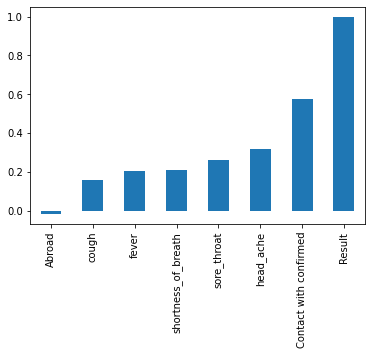

In [159]:
df.corr()["Result"][:-1].sort_values().plot(kind='bar')

In [160]:
df.corr()['Result'].sort_values()

Other                    -0.298255
Abroad                   -0.019221
cough                     0.158206
fever                     0.203330
shortness_of_breath       0.208574
sore_throat               0.261533
head_ache                 0.319198
Contact with confirmed    0.574346
Result                    1.000000
Name: Result, dtype: float64

In [161]:
df.dropna(inplace=True)
df.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication', 'Result', 'Abroad', 'Contact with confirmed',
       'Other'],
      dtype='object')

In [165]:
from sklearn.model_selection import train_test_split
X=df.drop(['Result','corona_result','age_60_and_above','gender','test_indication','Abroad','Other','test_date'],axis=1).values
y=df["Result"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [169]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
error= []
# Will take some time
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_i = rfc.predict(X_test)
error.append(np.mean(pred_i != y_test))

In [170]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score

In [171]:
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     68080
         1.0       0.80      0.51      0.62      3282

    accuracy                           0.97     71362
   macro avg       0.89      0.75      0.80     71362
weighted avg       0.97      0.97      0.97     71362



In [172]:
df3=df

In [173]:
df3.drop(['Result','corona_result','age_60_and_above','gender','test_indication','Abroad','Other','test_date'],axis=1)

,cough,fever,sore_throat,shortness_of_breath,head_ache,Contact with confirmed
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
219332,0,0,0,0,0,0
219333,1,1,1,0,0,1
219334,0,0,0,0,0,0
219335,1,1,0,1,0,0
